<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [3]</a>'.</span>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('../base_dados/beber_copia.csv', low_memory=False)


#### Verificar valores de instâncias

In [38]:
print("Atributos do DataFrame:")
print(df.columns.tolist())

Atributos do DataFrame:
['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein', 'smk_stat_type_cd', 'drk_yn', 'sbp_grupo', 'dbp_grupo', 'blds_grupo', 'tot_chole_grupo', 'hdl_chole_grupo', 'ldl_chole_grupo', 'triglyceride_grupo', 'hemoglobin_grupo', 'serum_creatinine_grupo', 'sgot_ast_grupo', 'gamma_gtp_grupo']


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [40]:
print("Valores únicos por atributo:")

df_colunas = df[df.columns]

for coluna in df_colunas.columns:
    # Garantir valores únicos e ordenados corretamente
    valores_unicos = sorted(set(df[coluna].dropna()))  # Usar set() para garantir a unicidade
    # Converter valores numéricos para inteiros ou floats simples
    valores_unicos = [int(valor) if isinstance(valor, (int, np.integer)) else valor for valor in valores_unicos]
    print(f"\nColuna: {coluna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}")


Valores únicos por atributo:

Coluna: sex
Valores únicos (2): ['Female', 'Male']

Coluna: age
Valores únicos (14): [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

Coluna: height
Valores únicos (13): [130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190]

Coluna: weight
Valores únicos (24): [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140]

Coluna: waistline
Valores únicos (102): [8, 27, 30, 32, 35, 40, 42, 43, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 145, 149, 999]

Coluna: sight_left
Valores únicos (4): [0, 1, 2, 9]

Coluna: sight_right
Valores únicos (4

## MÉTODO DO COTOVELO PARA SABER QUAL MELHOR VALOR PARA CADA ATRIBUTO

#### waistline

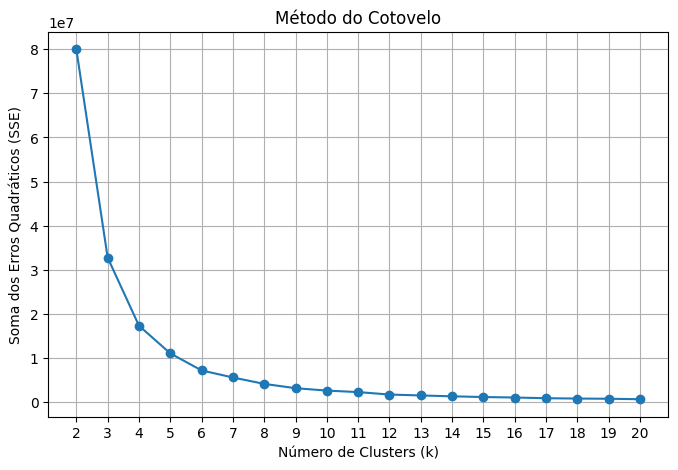

In [41]:

data = df[['waistline']].dropna()  # Remover valores ausentes

sse = []

# Intervalo de clusters de 2 a 20
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo')
plt.xticks(range(2, 21))
plt.grid()
plt.show()

In [42]:
X = data[['waistline']]

# Aplicar o KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['waistline'] = kmeans.fit_predict(X)

# Exibir os centroides dos clusters
centroides = kmeans.cluster_centers_
print("Centroides dos clusters:")
for i, centroide in enumerate(centroides):
    print(f"waistline {i}: {centroide[0]}")

Centroides dos clusters:
waistline 0: 91.16257089830084
waistline 1: 67.02946550395035
waistline 2: 999.0
waistline 3: 75.74761867704548
waistline 4: 83.34780575528077
waistline 5: 101.21581774335081


#### weight

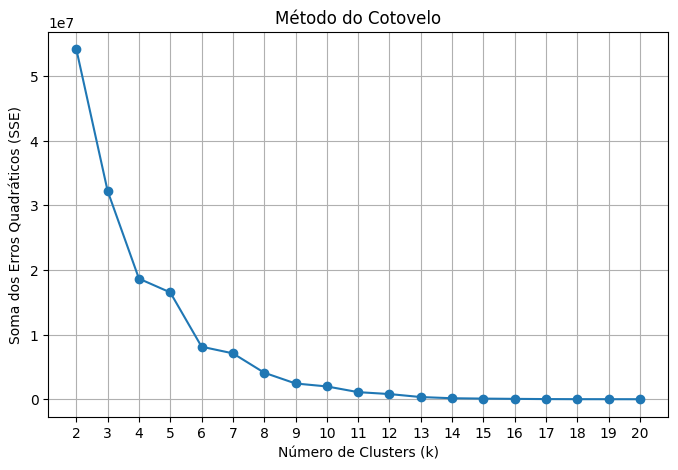

In [43]:

data = df[['weight']].dropna()  # Remover valores ausentes

sse = []

# Intervalo de clusters de 2 a 20
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo')
plt.xticks(range(2, 21))
plt.grid()
plt.show()

In [44]:
X = data[['weight']]

# Aplicar o KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
df['weight'] = kmeans.fit_predict(X)

# Exibir os centroides dos clusters
centroides = kmeans.cluster_centers_
print("Centroides dos clusters:")
for i, centroide in enumerate(centroides):
    print(f"weight {i}: {centroide[0]}")

Centroides dos clusters:
weight 0: 65.0000000000004
weight 1: 43.71381418093337
weight 2: 83.18738990683887
weight 3: 55.00000000000313
weight 4: 72.12263751364874
weight 5: 99.61506166360451
weight 6: 60.00000000000038
weight 7: 50.000000000003446


In [45]:
df = df.apply(pd.to_numeric, errors='ignore').astype('int64', errors='ignore')

C:\Users\jian_\AppData\Local\Temp\ipykernel_2548\38970050.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore').astype('int64', errors='ignore')


In [46]:
df.to_csv('../base_dados/beber_copia.csv', index=False)
